In [1]:
!pip install -q torch "torchvision==0.19.0" "diffusers==0.30.1" "transformers==4.44.2" "accelerate==0.33.0" "invisible-watermark>=0.2.0"

In [2]:
from diffusers import AutoPipelineForText2Image, AutoPipelineForImage2Image
import torch
from diffusers.utils import load_image, make_image_grid

In [3]:
pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

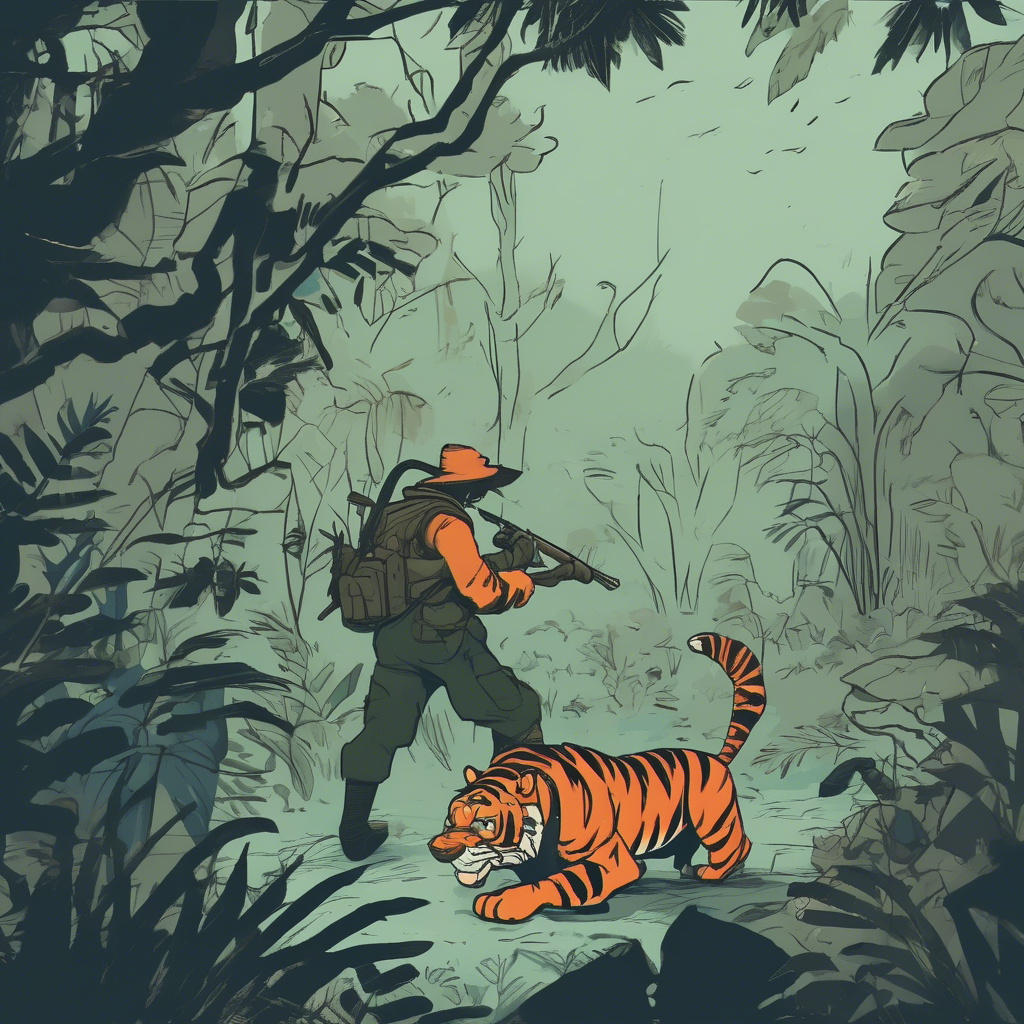

In [4]:
prompt = "Hunter hunts a tigger in a jungle, cold color palette"
image = pipeline_text2image(prompt=prompt).images[0]
image.save("textimg.png")
image

  0%|          | 0/40 [00:00<?, ?it/s]

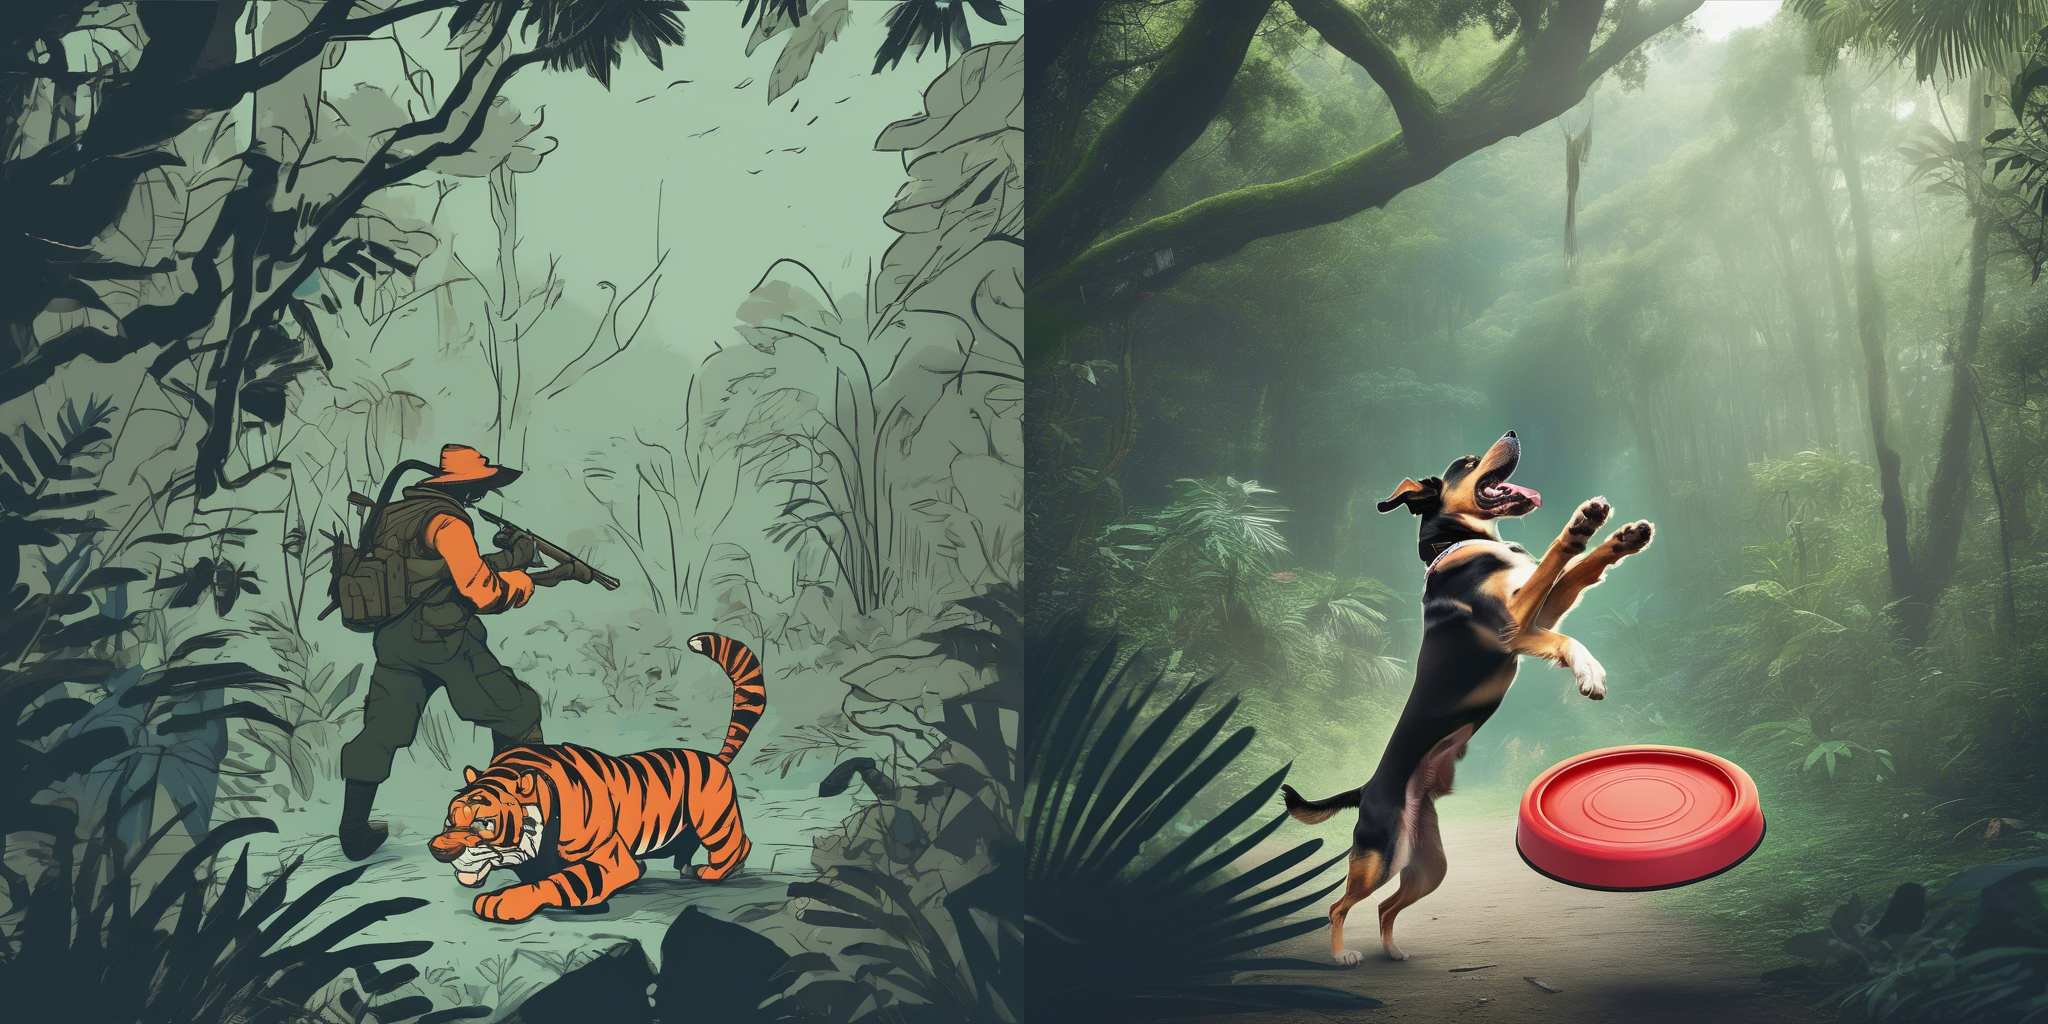

In [5]:
# avoid consuming additional memory when loading a checkpoint
pipeline = AutoPipelineForImage2Image.from_pipe(pipeline_text2image).to("cuda")

url = "/content/textimg.png"
init_image = load_image(url)

prompt = "a dog catching a frisbee in the jungle"
image = pipeline(prompt, image=init_image, strength=0.8, guidance_scale=10.5).images[0]
make_image_grid([init_image, image], rows=1, cols=2)